In [1]:
!pip install scikit-ntk

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.manifold import TSNE
import csv
from collections import Counter, defaultdict
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import gensim
import gensim.downloader
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from skntk import NeuralTangentKernel as NTK
import ast



In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:


data = pd.read_csv("/content/drive/MyDrive/preprocessed_data.csv")
text_column = data["preprocessed_joke"]  # Replace with your actual column name
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:


# Step 1: Load and Preprocess the Dat

# Fill null values with empty strings
data['preprocessed_joke'].fillna('', inplace=True)

# Preprocess text and tokenize
data['preprocessed_joke'] = data['preprocessed_joke'].apply(lambda x: word_tokenize(x.lower()))

# Step 2: Train Word2Vec Model
word2vec_model = Word2Vec(sentences=data['preprocessed_joke'], vector_size=300, window=5, sg=1)

# Step 3: Generate Word Embeddings
word_embeddings = dict(zip(word2vec_model.wv.index_to_key, word2vec_model.wv.vectors))

# Function to compute document embedding
def document_embedding(document, embeddings):
    doc_vector = np.zeros((300,))
    count = 0
    for word in document:
        if word in embeddings:
            doc_vector += embeddings[word]
            count += 1
    if count != 0:
        doc_vector /= count
    return doc_vector

# Compute document embeddings for each joke
document_embeddings = []
for joke in data['preprocessed_joke']:
    doc_emb = document_embedding(joke, word_embeddings)
    document_embeddings.append(doc_emb)

# Create a DataFrame with document embeddings
document_embeddings_df = pd.DataFrame(document_embeddings, columns=[f'emb_{i}' for i in range(300)])

# Concatenate the document embeddings DataFrame with the original data
data_with_embeddings = pd.concat([data, document_embeddings_df], axis=1)

# Save the data with embeddings to a CSV file
data_with_embeddings.to_csv('data_with_embeddings.csv', index=False)

# Create document embeddings for each document
X = np.array([document_embedding(doc, word_embeddings) for doc in data['preprocessed_joke']])
y = data['joke_type']  # Replace 'target_column' with the actual name of your target column



In [6]:
 # Step 5: Train SVM Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SVM

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7394784995425434


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")



Classification Report:
               precision    recall  f1-score   support

           0     0.6329    0.7417    0.6830      1088
           1     0.6883    0.5849    0.6324      1125
           2     0.6497    0.6376    0.6436      1079
           3     0.9982    1.0000    0.9991      1080

    accuracy                         0.7395      4372
   macro avg     0.7423    0.7411    0.7395      4372
weighted avg     0.7415    0.7395    0.7383      4372

Overall Accuracy: 0.7394784995425434

Accuracy per class:
Class '0': 0.7417
Class '1': 0.5849
Class '2': 0.6376
Class '3': 1.0000


In [7]:
svm_model = SVC(kernel='poly')
svm_model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7328453796889296


In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")



Classification Report:
               precision    recall  f1-score   support

           0     0.6165    0.7610    0.6812      1088
           1     0.7089    0.5520    0.6207      1125
           2     0.6439    0.6284    0.6360      1079
           3     0.9791    0.9972    0.9881      1080

    accuracy                         0.7328      4372
   macro avg     0.7371    0.7347    0.7315      4372
weighted avg     0.7366    0.7328    0.7303      4372

Overall Accuracy: 0.7328453796889296

Accuracy per class:
Class '0': 0.7610
Class '1': 0.5520
Class '2': 0.6284
Class '3': 0.9972


KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize k-NN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the k-NN classifier
knn_clf.fit(X_train, y_train)

# Predict labels for test set
y_pred = knn_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6422689844464776


In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")



Classification Report:
               precision    recall  f1-score   support

           0     0.6084    0.4384    0.5096      1088
           1     0.6298    0.4249    0.5074      1125
           2     0.4930    0.7164    0.5841      1079
           3     0.8565    1.0000    0.9227      1080

    accuracy                         0.6423      4372
   macro avg     0.6469    0.6449    0.6309      4372
weighted avg     0.6467    0.6423    0.6295      4372

Overall Accuracy: 0.6422689844464776

Accuracy per class:
Class '0': 0.4384
Class '1': 0.4249
Class '2': 0.7164
Class '3': 1.0000


XG-B

In [ ]:
# Initialize and train the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softprob' if len(set(y_train)) > 2 else 'binary:logistic')
# Adjust objective for multi-class or binary classification
xgb_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7344464775846294


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")



Classification Report:
               precision    recall  f1-score   support

           0     0.6432    0.7206    0.6797      1088
           1     0.6582    0.6009    0.6283      1125
           2     0.6443    0.6228    0.6334      1079
           3     0.9963    0.9991    0.9977      1080

    accuracy                         0.7344      4372
   macro avg     0.7355    0.7358    0.7347      4372
weighted avg     0.7346    0.7344    0.7336      4372

Overall Accuracy: 0.7344464775846294

Accuracy per class:
Class '0': 0.7206
Class '1': 0.6009
Class '2': 0.6228
Class '3': 0.9991


NTK

TSNE

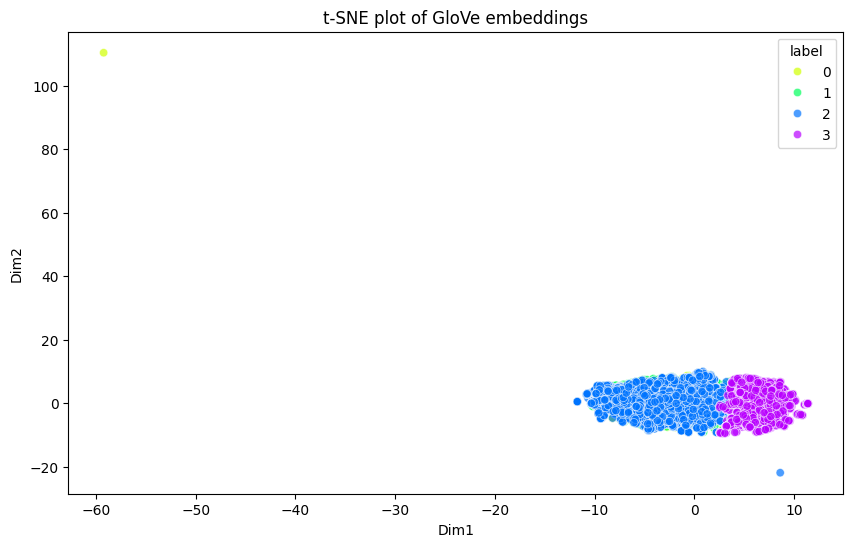

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/data_with_embeddings.csv')  # Update with your file path
# Assuming your CSV file has columns for each GloVe embedding dimension, e.g., 'glove_1', 'glove_2', ..., 'glove_100'
# And a column named 'label' for the joke type


# Extract features (GloVe embeddings starting from the 6th column) and labels
features = data.iloc[:,5:].values  # Extracting columns from the 6th to the second last column
labels = data['joke_type'].values
# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_features = tsne_model.fit_transform(features)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_features, columns=['Dim1', 'Dim2'])
tsne_df['label'] = labels

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Dim1', y='Dim2',
    hue='label',
    palette=sns.color_palette("hsv", len(set(labels))),
    data=tsne_df,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE plot of GloVe embeddings')
plt.show()
